# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "Cholesterol". Use 7-fold cross-validation for the hyper-parameter tuning, tune the parameters "max_depth", "max_features", and "min_samples_split". Provide at least 4 values for each parameter.

## Dataset description

### Features

* id - patient identifier
* age - patient age
* height(cm) - patient height in cm
* weight(kg) - patient weight in kg
* waist(cm) - patient waist diameter in cm
* eyesight(left) - patient eyesight left eye
* eyesight(right) - patient eyesight right eye
* hearing(left) - patient hearing condition left ear
* hearing(right) - patient hearing condition right ear
* systolic - patient systolic blood pressure
* relaxation - patient relaxation blood pressure
* fasting blood sugar - patient blood sugar level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - patient dental status
* smoking - whether the patient is a smoker


### Target variable
* Cholesterol - patient cholesterol level

### Download the dataset

In [3]:
! gdown 1rhn4PwdSJLL1o5cCnKYI2moC9aXOyNt7

Downloading...
From: https://drive.google.com/uc?id=1rhn4PwdSJLL1o5cCnKYI2moC9aXOyNt7
To: /content/train.csv
100% 13.1M/13.1M [00:00<00:00, 64.2MB/s]


### Read the dataset

In [28]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [8]:
df=pd.read_csv('/content/train.csv')

In [12]:
df = df.drop(columns=['id'])

In [13]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,55,80,14.4,1,1.1,22,17,37,0,1


In [14]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [16]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [17]:
X=df.drop('smoking',axis=1)
Y=df['smoking']

### Check if dataset is balanced, or if not applicable give your reasons why



Class Distribution:
0    89603
1    69653
Name: smoking, dtype: int64


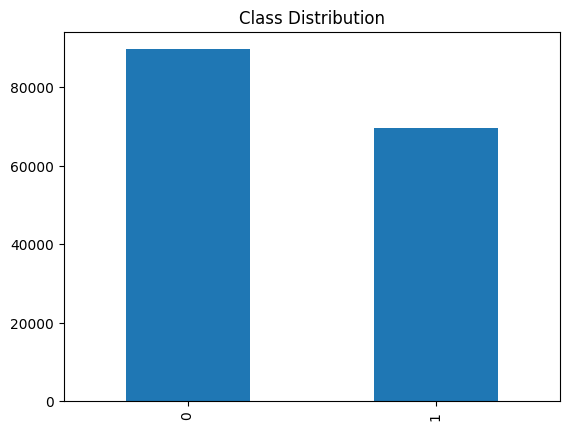

In [18]:
if 'smoking' in df.columns:
    class_distribution = df['smoking'].value_counts()
    print("Class Distribution:")
    print(class_distribution)

    class_distribution.plot(kind='bar', title='Class Distribution')
else:
    print("No target variable found.")

<Axes: title={'center': 'Checking the balance of the dataset'}>

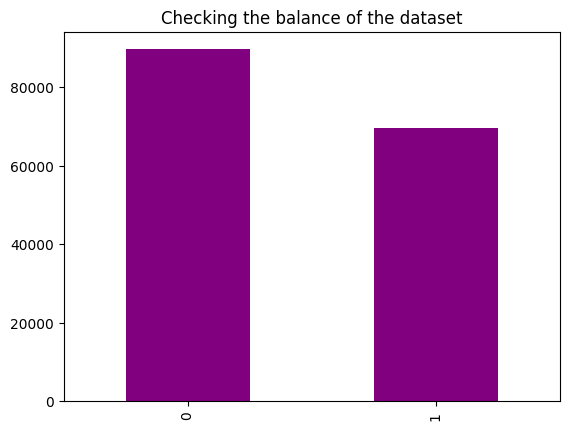

In [22]:
df['smoking'].value_counts().plot.bar(color='purple',title='Checking the balance of the dataset')

### Perform all necessary transformations of the data

### Hyper-parameter tuning and cross-validation

Choose a metric to optimize, choose hyper parameter values to experiment with, perform 5-fold cross-validation.

In [23]:
dt_classifier=DecisionTreeClassifier()

In [24]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10]
}

In [27]:
cv_stratified=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
nan_indices = Y.index[Y.isna()]
if not nan_indices.empty:
    # Remove rows with NaN values in the target variable
    X = X.drop(index=nan_indices)
    Y = Y.drop(index=nan_indices)

In [33]:
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=cv_stratified)
grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### Evaluate the performance of the best model using multiple metrics

Calculate metrics

Display a confusion matrix if applicable

In [34]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [35]:
final_dt_model = DecisionTreeClassifier(**best_params)

In [37]:
cv_results = cross_val_score(final_dt_model, X, Y, cv=cv_stratified, scoring='accuracy')

In [38]:
print("Cross-Validation Results:")
print("Mean Accuracy:", cv_results.mean())
print("Accuracy Standard Deviation:", cv_results.std())

Cross-Validation Results:
Mean Accuracy: 0.7562980419001948
Accuracy Standard Deviation: 0.001953830830068064


In [40]:
predictions = cross_val_predict(final_dt_model, X, Y, cv=cv_stratified)
accuracy = accuracy_score(Y, predictions)
precision = precision_score(Y, predictions)
recall = recall_score(Y, predictions)
f1 = f1_score(Y, predictions)
roc_auc = roc_auc_score(Y, predictions)